In [1]:
#load up modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import pickle
import os

import category_encoders as ce

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm


import tensorflow as tf
from tensorflow import keras
from keras import layers

In [2]:
#Get dir
path="D:/Kuliah/Semester 5/PSD/psd-challenge/Kerja lah su/Challenge 2/"
os.listdir(path)

def savefile(result, savename):
    try:
        pd.DataFrame(zip(range(1,len(result)+1),result), columns=["No", "UHH"]).to_csv(path+savename+".csv", index=False)
    except:
        print("It only saves the result retard!")

In [3]:
#Get dataset                                #Gw baru nyadar train di split lagi?
test_data=pd.read_excel(path+"Data/Data Test.xlsx")
train=pd.read_excel(path+"Data/Data Train.xlsx")

In [4]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [5]:
def rsq_plot(history):
  plt.plot(history.history['r2score'], label='r2score')
  plt.plot(history.history["val_r2score"], label='val_r2score')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('rsq')
  plt.legend()
  plt.grid(True)

In [6]:
def r2score(y_true, y_pred):
    SS_res =  keras.backend.sum(keras.backend.square( y_true-y_pred ))
    SS_tot = keras.backend.sum(keras.backend.square(y_true - keras.backend.mean(y_true)))
    return (1 - (SS_res/SS_tot))

In [7]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(16, kernel_initializer='normal', activation='relu'),
      layers.Dense(32, kernel_initializer='normal', activation='relu'),
      layers.Dense(64, kernel_initializer='normal', activation='relu'),
      layers.Dense(1, kernel_initializer='normal')
  ])

  model.compile(loss='mean_absolute_percentage_error',
                optimizer=tf.keras.optimizers.Adam(), metrics=r2score)
  return model

In [15]:
train_data, validation_data, train_value, validation_value= train_test_split(X, y, train_size=0.9)

normalizer = keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_data))

dnn_model = build_and_compile_model(normalizer)

history=dnn_model.fit(X, y, verbose=1, validation_data=(validation_data, validation_value), epochs=16)

Epoch 1/16
286/286 [==============================] - 2s 2ms/step - loss: 45.9201 - r2score: -15.0366 - val_loss: 14.1667 - val_r2score: -0.2145
Epoch 2/16
286/286 [==============================] - 0s 2ms/step - loss: 12.5343 - r2score: -0.0047 - val_loss: 12.7889 - val_r2score: -0.0105
Epoch 3/16
286/286 [==============================] - 1s 2ms/step - loss: 11.9873 - r2score: 0.0866 - val_loss: 12.2098 - val_r2score: 0.0963
Epoch 4/16
286/286 [==============================] - 0s 2ms/step - loss: 11.8071 - r2score: 0.1100 - val_loss: 11.9938 - val_r2score: 0.1198
Epoch 5/16
286/286 [==============================] - 1s 2ms/step - loss: 11.6929 - r2score: 0.1256 - val_loss: 12.1205 - val_r2score: 0.1616
Epoch 6/16
286/286 [==============================] - 0s 1ms/step - loss: 11.6063 - r2score: 0.1405 - val_loss: 11.8590 - val_r2score: 0.1460
Epoch 7/16
286/286 [==============================] - 0s 2ms/step - loss: 11.5192 - r2score: 0.1563 - val_loss: 11.7105 - val_r2score: 0.1848
E

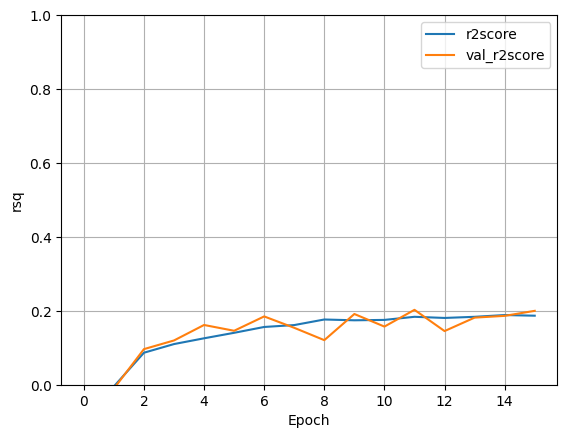

In [16]:
rsq_plot(history)

In [17]:
predict=dnn_model.predict(test_data)

96/96 [==============================] - 0s 1ms/step


In [25]:
predict=predict.flatten()

In [27]:
savefile(predict, "hahaha2")